# Importing data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('wine.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [6]:
df.shape # checking the number of columns and rows

(1599, 12)

In [7]:
df.quality.unique() # checking all options for quality

array(['bad', 'good'], dtype=object)

In [8]:
df.isnull().sum() # searching for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

unique value

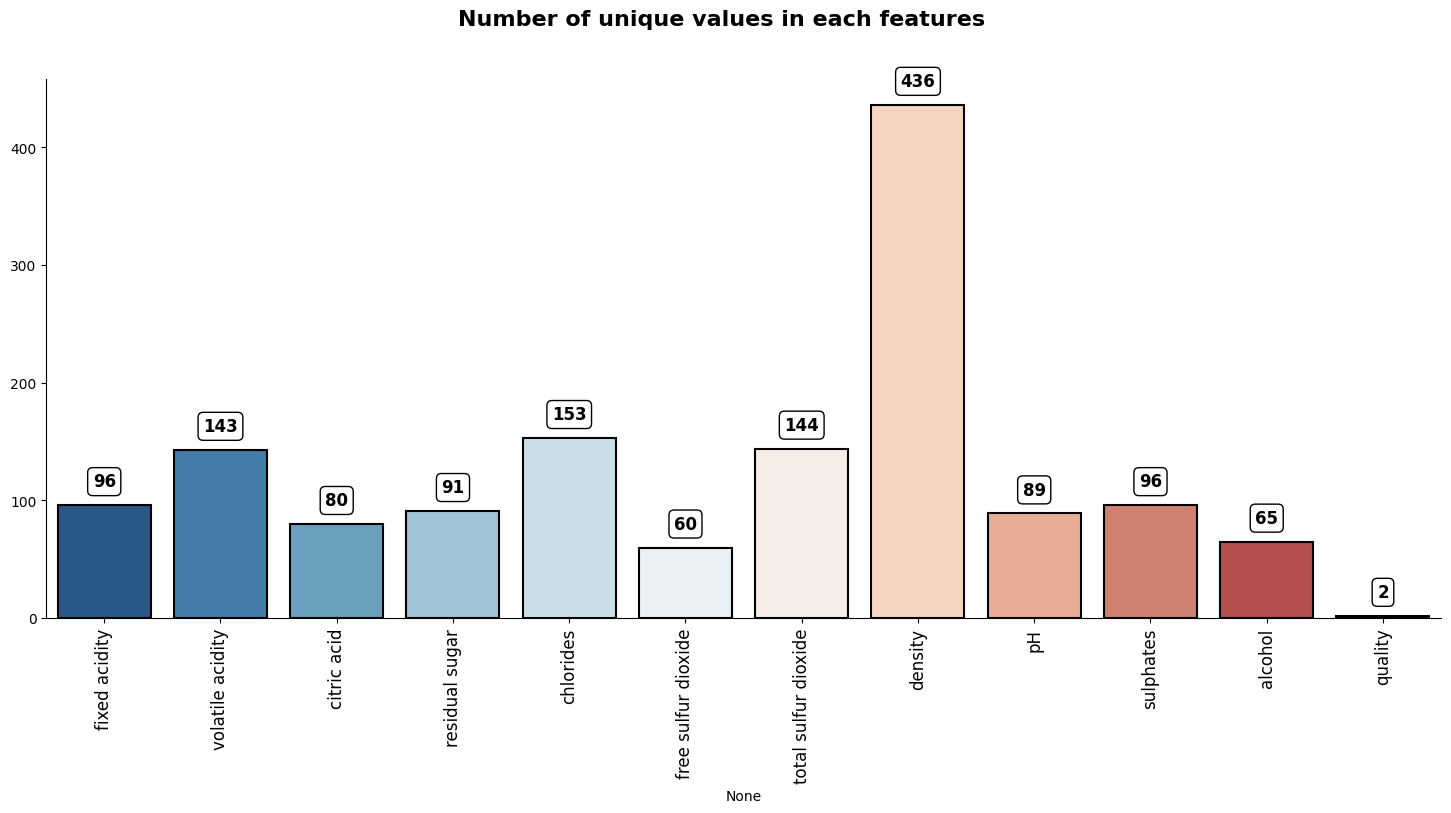

In [9]:
plt.figure(figsize=(18,7))

figure = sns.barplot(x=df.columns, y=df.nunique().values, 
            palette='RdBu_r', linewidth=1.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=12)

for p in figure.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    figure.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'))
    
plt.suptitle(t = 'Number of unique values in each features', fontsize = 16, weight = 'bold') 
sns.despine()
plt.show()

### Which quality count is more

<Axes: xlabel='Quality', ylabel='Count'>

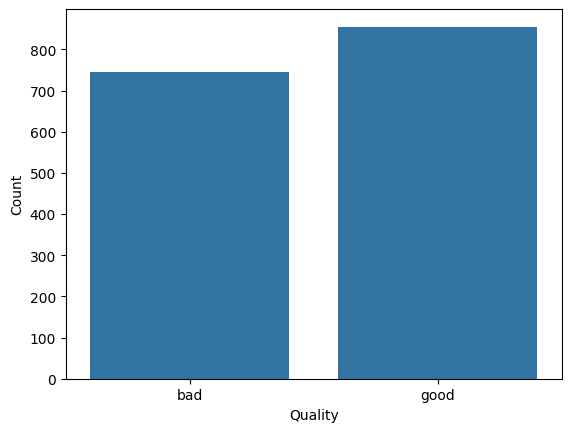

In [10]:
plt.xlabel("Quality")
plt.ylabel("Count")
sns.countplot(x=df.quality)

### Changes in dataset for better machine readibilty

In [11]:
# classifying quality as a numeric column
df['quality_num'] = df.quality.map({'bad':0,'good':1})

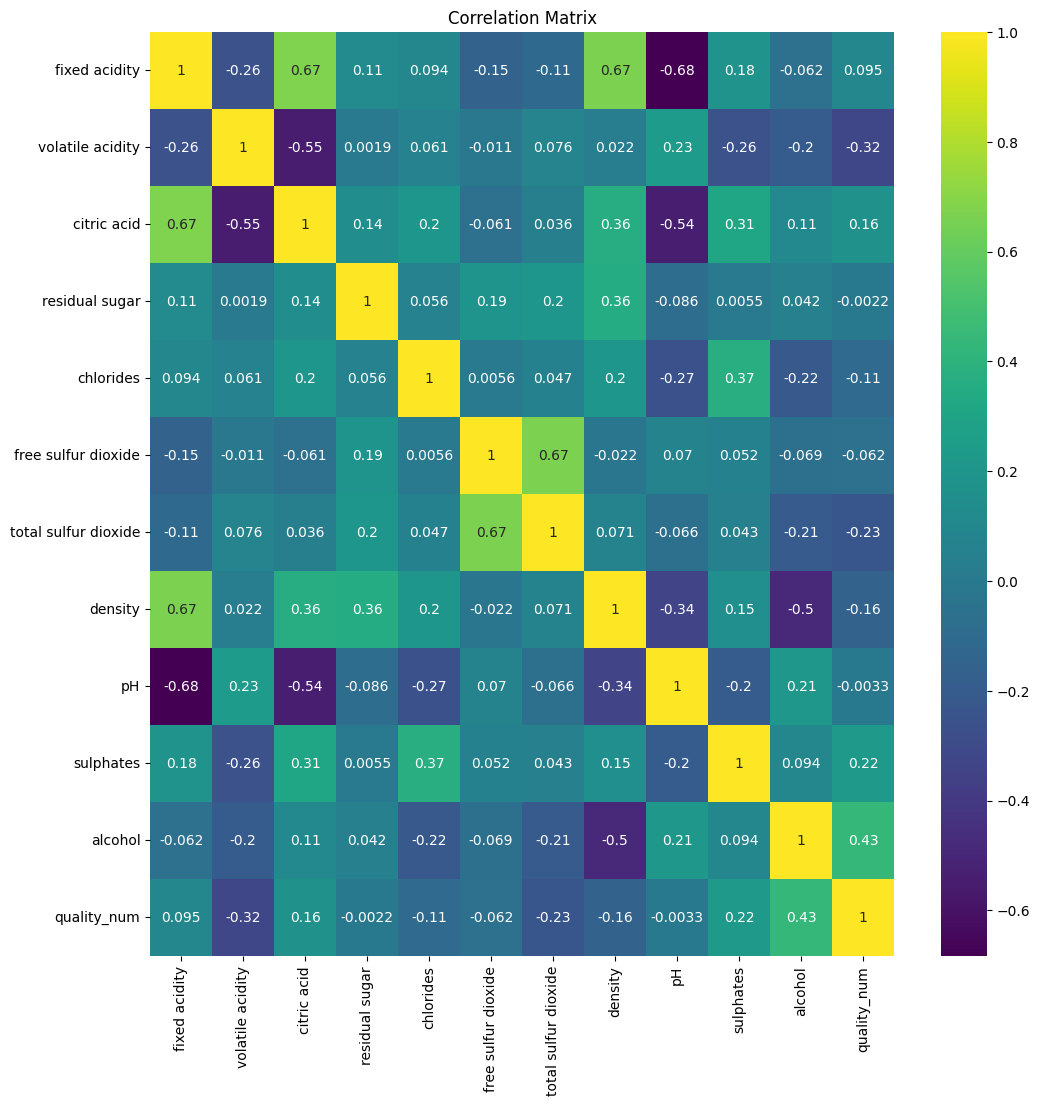

In [12]:

# Remove non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric data
corr = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='viridis', annot=True)
plt.title("Correlation Matrix")
plt.show()

# Data preprocessing

In [13]:
# dropping quality column
df.drop('quality',axis=1,inplace=True)

# verify if it's dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_num           1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Declaring feature and target variable

In [14]:
X = df.drop('quality_num',axis=1)
y = df.quality_num

### Splitting data into training and test set

In [15]:
# split data into training and test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Further spliting the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
# checking shape of x train and x test
X_train.shape, X_test.shape,X_val.shape,


((1199, 11), (200, 11), (200, 11))

### Scaling the dataset

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_temp = sc.fit_transform(X_temp)
X_val = sc.fit_transform(X_val)


## Finding best parameter for tuning

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search using validation set
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Validation Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.7956787802840434


# Model Training and Evaluation

In [19]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

rfc = RandomForestClassifier(n_estimators=10,random_state = 42)

# fit the model
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])



print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(f'ROC-AUC score with 10 decision trees: {roc_auc:.4f}')



Model accuracy score with 10 decision-trees : 0.7200
ROC-AUC score with 10 decision trees: 0.8234


In [20]:
# Evaluation on validation set
y_val_pred = rfc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with 10 random trees: {val_accuracy:.4f}')

Validation Accuracy with 10 random trees: 0.7750


Confusion matrix

 [[62 25]
 [31 82]]


<Axes: >

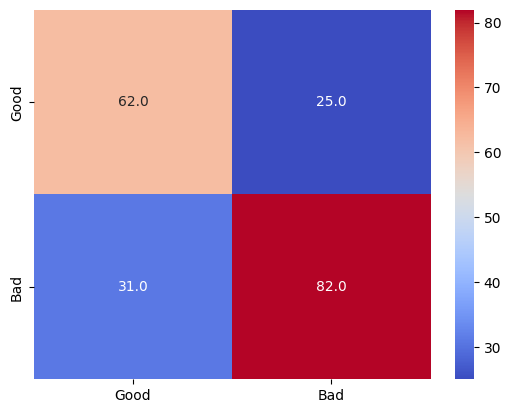

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
#plotting the confusion matrix
print('Confusion matrix\n\n', cm)
sns.heatmap(cm,xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'], fmt='.1f',annot=True, cmap="coolwarm")

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        87
           1       0.77      0.73      0.75       113

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



# Performance for varying training data sizes

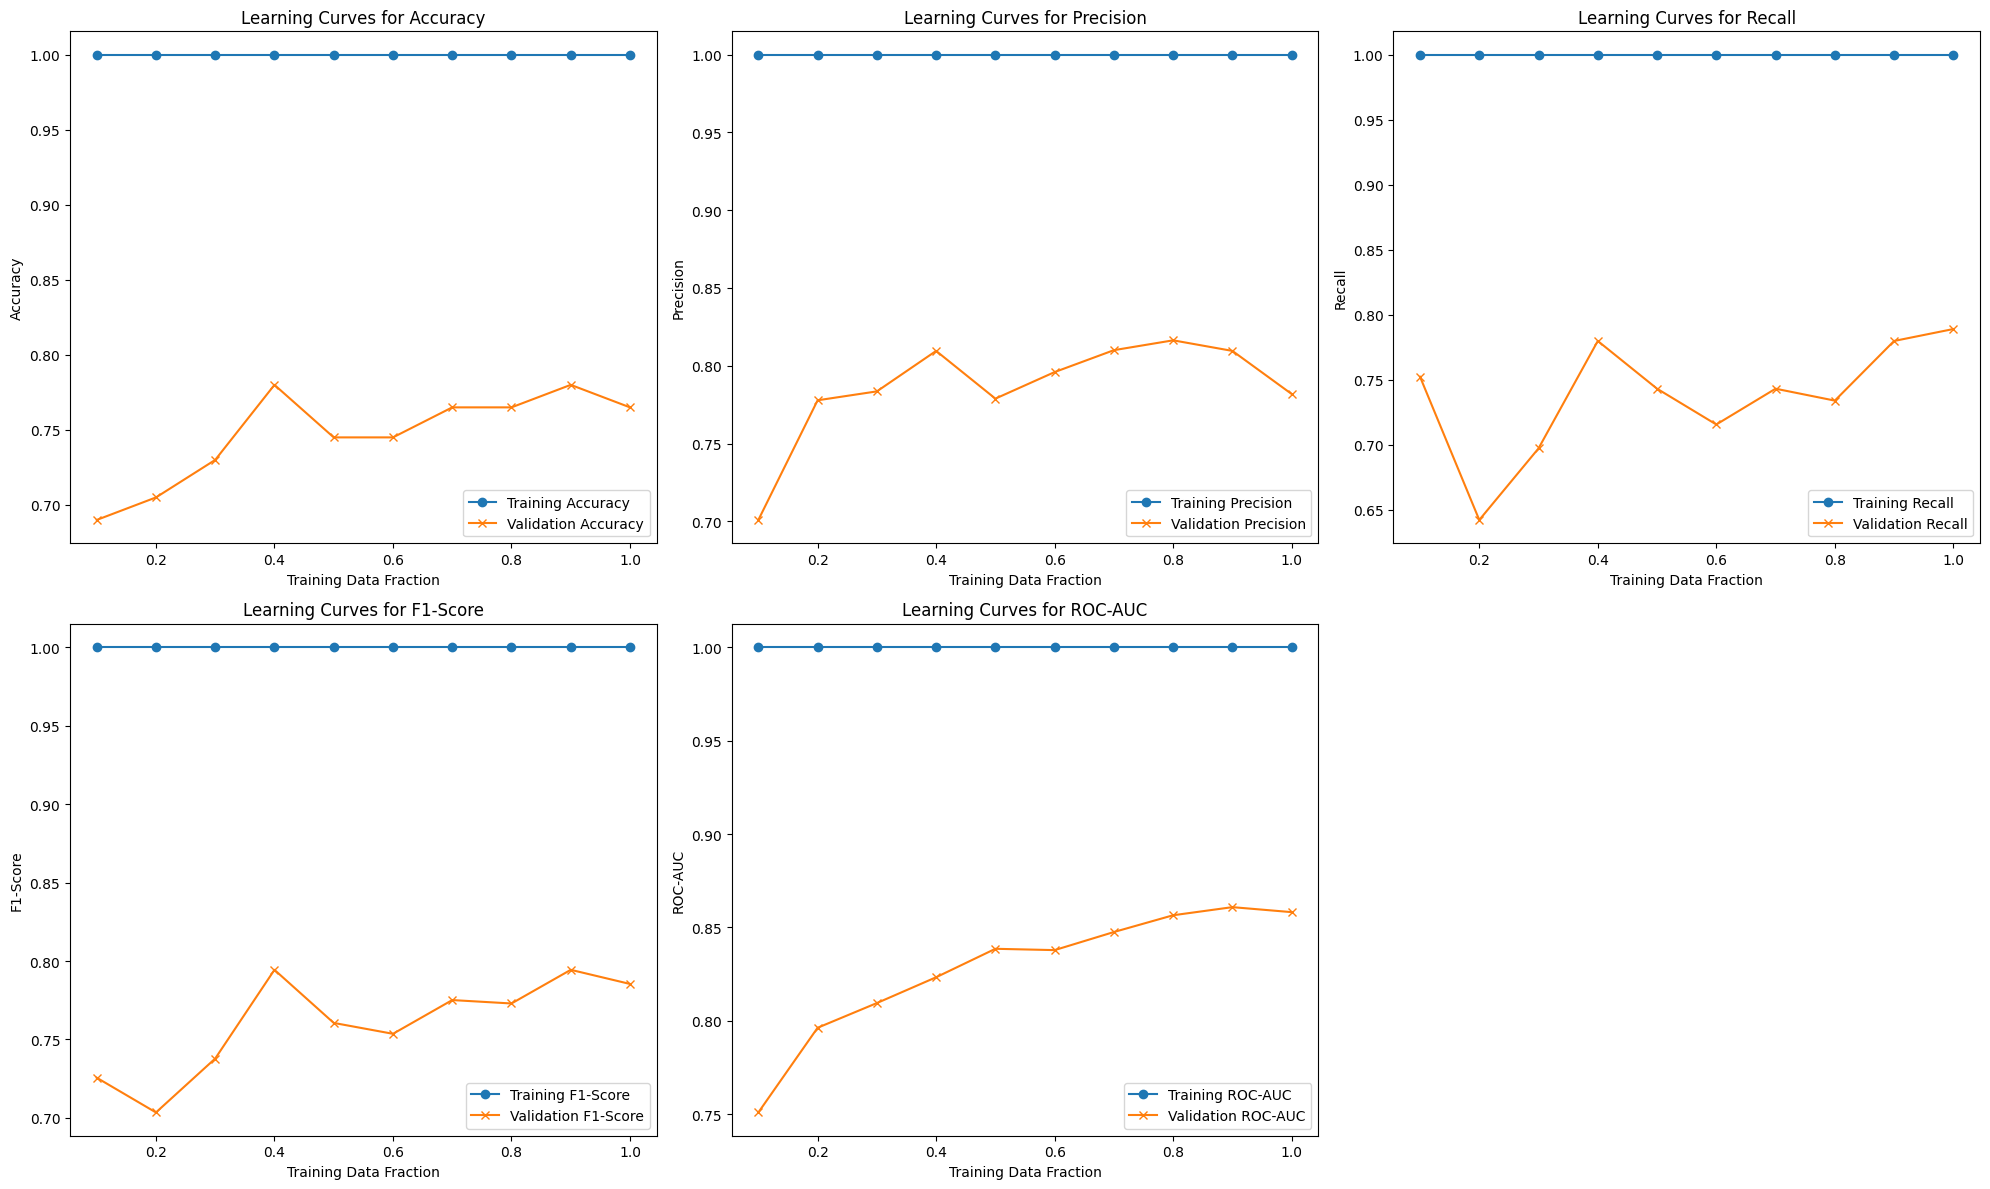

In [23]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Define sizes of training data to use
subset_sizes = np.linspace(0.1, 1.0, 10)

# Create lists for performance metrics
train_acc_list = []
val_acc_list = []
train_prec_list = []
val_prec_list = []
train_recall_list = []
val_recall_list = []
train_f1_list = []
val_f1_list = []
train_roc_auc_list = []
val_roc_auc_list = []

# Train models with varying amounts of training data
for subset_size in subset_sizes:
    # Subsample the training data
    X_subset_train = X_train[:int(subset_size * len(X_train))]
    y_subset_train = y_train[:int(subset_size * len(y_train))]

    # Train the model
    rf_model_subset = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    rf_model_subset.fit(X_subset_train, y_subset_train)

    # Predictions on training and validation sets
    y_train_pred_subset = rf_model_subset.predict(X_subset_train)
    y_val_pred_subset = rf_model_subset.predict(X_val)

    # Calculate performance metrics
    train_acc = accuracy_score(y_subset_train, y_train_pred_subset)
    val_acc = accuracy_score(y_val, y_val_pred_subset)
    train_prec = precision_score(y_subset_train, y_train_pred_subset)
    val_prec = precision_score(y_val, y_val_pred_subset)
    train_recall = recall_score(y_subset_train, y_train_pred_subset)
    val_recall = recall_score(y_val, y_val_pred_subset)
    train_f1 = f1_score(y_subset_train, y_train_pred_subset)
    val_f1 = f1_score(y_val, y_val_pred_subset)
    train_roc_auc = roc_auc_score(y_subset_train, rf_model_subset.predict_proba(X_subset_train)[:, 1])
    val_roc_auc = roc_auc_score(y_val, rf_model_subset.predict_proba(X_val)[:, 1])

    
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_prec_list.append(train_prec)
    val_prec_list.append(val_prec)
    train_recall_list.append(train_recall)
    val_recall_list.append(val_recall)
    train_f1_list.append(train_f1)
    val_f1_list.append(val_f1)
    train_roc_auc_list.append(train_roc_auc)
    val_roc_auc_list.append(val_roc_auc)

# Line graph for each metric
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [train_acc_list, train_prec_list, train_recall_list, train_f1_list, train_roc_auc_list]
val_metrics = [val_acc_list, val_prec_list, val_recall_list, val_f1_list, val_roc_auc_list]

plt.figure(figsize=(20, 12))
for idx, metric_name in enumerate(metric_names):
    plt.subplot(2, 3, idx + 1)
    plt.plot(subset_sizes, train_metrics[idx], label=f'Training {metric_name}', marker='o')
    plt.plot(subset_sizes, val_metrics[idx], label=f'Validation {metric_name}', marker='x')
    plt.xlabel('Training Data Fraction')
    plt.ylabel(metric_name)
    plt.title(f'Learning Curves for {metric_name}')
    plt.legend()

plt.tight_layout()
plt.show()



# How performance defers with the change of number of estimators

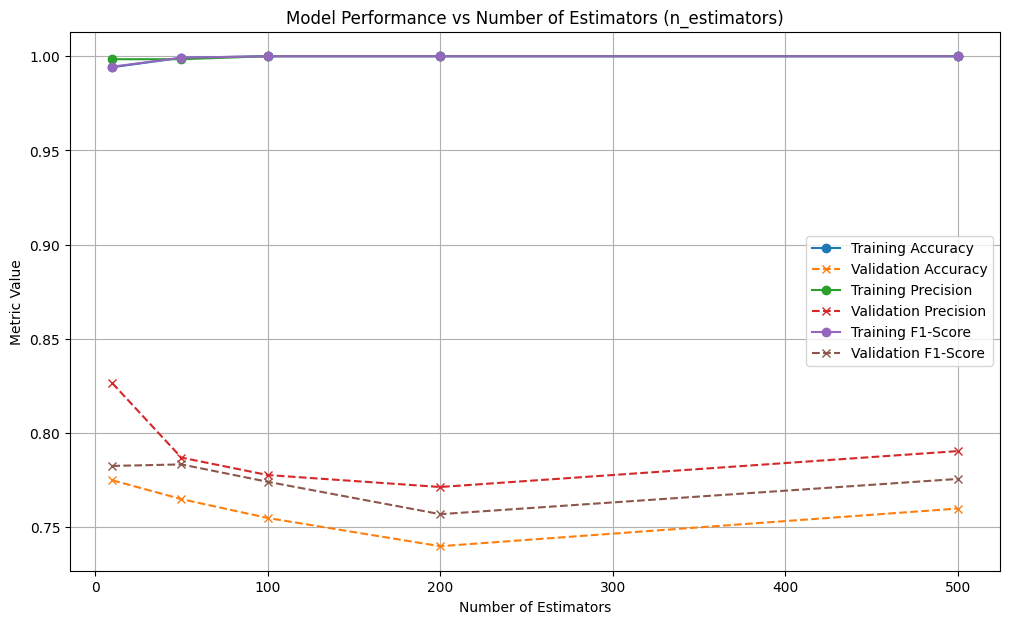

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Define hyperparameter values 
n_estimators_list = [10, 50, 100, 200, 500]

#  store results for each metric
metric_names = ['Accuracy', 'Precision', 'F1-Score']
training_metrics = {metric: [] for metric in metric_names}
validation_metrics = {metric: [] for metric in metric_names}

# Train and evaluate the model 
for n_estimators in n_estimators_list:
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict on training and validation datasets
    train_predictions = rf_classifier.predict(X_train)
    val_predictions = rf_classifier.predict(X_val)

    # Calculate and store metrics for training and validation data
    training_metrics['Accuracy'].append(accuracy_score(y_train, train_predictions))
    validation_metrics['Accuracy'].append(accuracy_score(y_val, val_predictions))

    training_metrics['Precision'].append(precision_score(y_train, train_predictions))
    validation_metrics['Precision'].append(precision_score(y_val, val_predictions))

    training_metrics['F1-Score'].append(f1_score(y_train, train_predictions))
    validation_metrics['F1-Score'].append(f1_score(y_val, val_predictions))

# Plot results
plt.figure(figsize=(12, 7))

# Plot each metric for training and validation datasets
for metric in metric_names:
    plt.plot(n_estimators_list, training_metrics[metric], label=f"Training {metric}", marker='o')
    plt.plot(n_estimators_list, validation_metrics[metric], label=f"Validation {metric}", marker='x', linestyle='dashed')

plt.title("Model Performance vs Number of Estimators (n_estimators)")
plt.xlabel("Number of Estimators")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


# Crossvalidation metrics compared


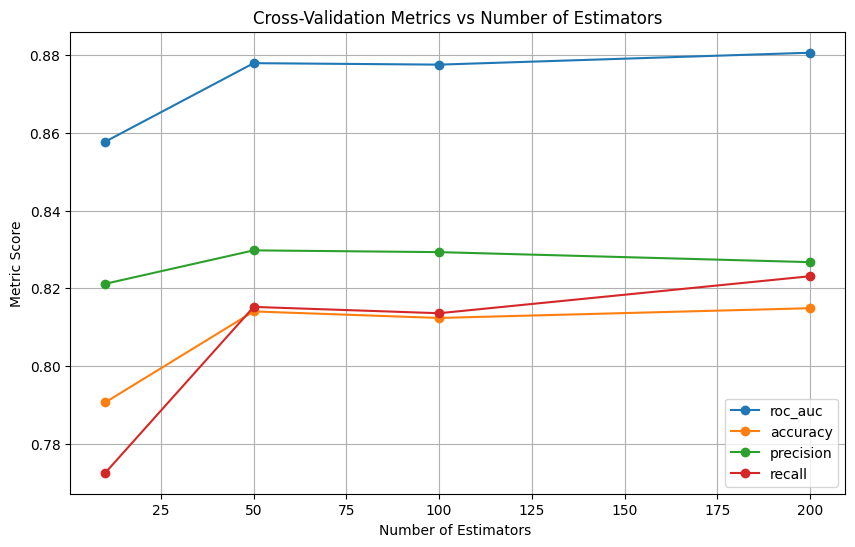

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score

# Define custom scoring metrics
scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation for different values of n_estimators
n_estimators_values = [10, 50, 100, 200]
cv_results = {'roc_auc': [], 'accuracy': [], 'precision': [], 'recall': []}


for n in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n, random_state=420, class_weight="balanced")
    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    # Store the mean score for each metric
    for metric in cv_results:
        cv_results[metric].append(np.mean(results[f'test_{metric}']))

# Plotting
plt.figure(figsize=(10, 6))
for metric, values in cv_results.items():
    plt.plot(n_estimators_values, values, label=metric, marker='o')

plt.title("Cross-Validation Metrics vs Number of Estimators")
plt.xlabel("Number of Estimators ")
plt.ylabel("Metric Score")
plt.legend()
plt.grid(True)
plt.show()
